Análise de Redes - Rede co-ocorrência da playlist do Spotify

Este notebook foi desenvolvido com o Jupyter Notebook (anaconda3).
O arquivo com o banco de dados: mpd.slice.0-999.json, esta disponível para Download na pasta data.

In [1]:
!pip install networkx==2.6.2
!pip install nxviz==0.6.3

In [1]:
from operator import itemgetter
import networkx as nx
import pandas as pd
import json
import numpy as np
from scipy.sparse import csr_matrix

import nxviz
from nxviz.plots import CircosPlot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
arrayList = []

Função criada conforme dica no link: https://github.com/vaslnk/Spotify-Song-Recommendation-ML/blob/master/EDA.ipynb

Lê a tabela

In [3]:
path = '/content/drive/MyDrive/Cursos/BTI/13 Semestre/Analise de Redes/trabalhos/mpd.slice.0-999.json' #'C:/arquivos/Analise de redes/mpd.slice.0-999.json'
d = json.load(open(path, 'r'))
thisSlice = pd.DataFrame.from_dict(d['playlists'], orient='columns')

In [2]:
#start = 0
#end = 1000
#path = 'C:/arquivos/Analise de redes/mpd.slice.' + str(start) + "-" + str(end-1) + '.json'
#d = json.load(open(path, 'r'))
#thisSlice = pd.DataFrame.from_dict(d['playlists'], orient='columns')

Transforma o dataframe da playlist em dataframe de nível de música 

In [4]:
for index, row in thisSlice.iterrows():
    for track in row['tracks']:
        arrayList.append([track['track_uri'], track['artist_name'], track['track_name'], row['pid']])
lista = pd.DataFrame(arrayList, columns=['trackid', 'artist_name', 'track_name', 'pid'])


In [6]:
display(lista.shape)


(67503, 4)

In [7]:
lista.head(10)   #is a df of all track ids, cooresponding artist names, track names and playlist ids

,trackid,artist_name,track_name,pid
0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),0
1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,Britney Spears,Toxic,0
2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,Beyoncé,Crazy In Love,0
3,spotify:track:1AWQoqb9bSvzTjaLralEkT,Justin Timberlake,Rock Your Body,0
4,spotify:track:1lzr43nnXAijIGYnCT8M8H,Shaggy,It Wasn't Me,0
5,spotify:track:0XUfyU2QviPAs6bxSpXYG4,Usher,Yeah!,0
6,spotify:track:68vgtRHr7iZHpzGpon6Jlo,Usher,My Boo,0
7,spotify:track:3BxWKCI06eQ5Od8TY2JBeA,The Pussycat Dolls,Buttons,0
8,spotify:track:7H6ev70Weq6DdpZyyTmUXk,Destiny's Child,Say My Name,0
9,spotify:track:2PpruBYCo4H7WOBJ7Q2EwM,OutKast,Hey Ya! - Radio Mix / Club Mix,0


Matriz de co-ocorrência

In [8]:
matriz = lista.drop(['artist_name', 'track_name'], axis=1).pivot_table(index=["pid"], columns="trackid", aggfunc=lambda x: 1, fill_value=0)
print(matriz.shape)
matriz.head()

(1000, 34443)


trackid,spotify:track:000mA0etY38nKdvf1N04af,spotify:track:000xQL6tZNLJzIrtIgxqSl,spotify:track:006AVH7fq061voGXkUiII4,spotify:track:006PJvsr6CyV3JdBf7wiNF,spotify:track:006yrnQMCZpiUgkR612gC8,spotify:track:00BuKLSAFkaEkaVAgIMbeA,spotify:track:00Ci0EXS4fNPnkTbS6wkOh,spotify:track:00CmjeeHvAVKvx3tcIiZTy,spotify:track:00DYRuYJQzfI6dH4Adkimo,spotify:track:00DlEKhhlQNtjnJk7xqB9O,...,spotify:track:7znZvX0Mt6NBmaI8VCPurT,spotify:track:7zo8XAMYBG6nGpqGiIudBc,spotify:track:7zprfY9KDG8g3S5BIOB7xZ,spotify:track:7zqLBFKCBkk5IfbgKgH4VZ,spotify:track:7zscdQe9CjzXnqT3P1Ey7K,spotify:track:7zsw78LtXUD7JfEwH64HK2,spotify:track:7zuwaenG5AF0vG7o7kMduX,spotify:track:7zxRMhXxJMQCeDDg0rKAVo,spotify:track:7zz1drChhd4hQBiGSnLRBZ,spotify:track:7zzBEZBTJejWeL6EqWmCD9
pid,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
%%time
matriz = csr_matrix(matriz)

C = matriz.T * matriz
print(C.shape)

(34443, 34443)
Wall time: 847 ms


Compactando o Array para melhorar o desempenho

In [10]:
C.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [11]:
song_freq_vec = np.sum(matriz, axis=0)

In [12]:
song_freq_vec = song_freq_vec.reshape(34443, 1)

Cria uma nova matriz com as informações da matriz de Coocorrência

In [77]:
M = nx.Graph()

A variável 'tam' controla o tamanho da matriz, que por motivo de desempenho do hardware usado para esta simulação, foi necessário reduzir o tamanho. Ajuste para o tamanho máximo de registros -1.

In [33]:
tam = 1000 #34442 #tamanho da matriz

In [78]:
for i in range(tam):
    M.add_node(i)

In [79]:
for i in range(tam):
    for j in range(tam):
        if i != j:
            if C[i,j] > 0:
                M.add_edge(i, j)

In [80]:
print(M)

Graph with 1000 nodes and 2697 edges


In [37]:
for n, d in M.nodes(data=True):
    M.nodes[n]["class"] = M.degree(n)

Gráfico CircosPlot

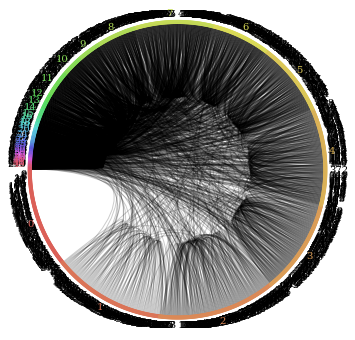

In [38]:
c = CircosPlot(
    M,
    node_grouping="class",
    node_color="class",
    node_order="class",
    node_labels=True,
    group_label_position="middle",
    group_label_color=True,
    group_label_offset=2,
)
c.draw()
plt.show()

Centralidade de Grau

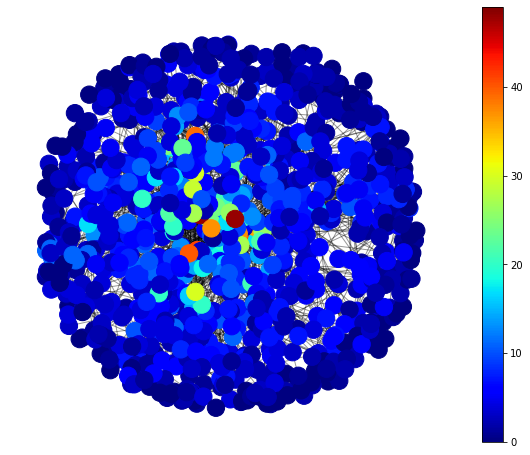

In [51]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(M)).values())

# draw edges
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

In [53]:
nx.degree_centrality(M)

{0: 0.0,
 1: 0.008008008008008008,
 2: 0.0,
 3: 0.008008008008008008,
 4: 0.0,
 5: 0.02102102102102102,
 6: 0.0,
 7: 0.001001001001001001,
 8: 0.006006006006006006,
 9: 0.003003003003003003,
 10: 0.007007007007007007,
 11: 0.004004004004004004,
 12: 0.002002002002002002,
 13: 0.001001001001001001,
 14: 0.0,
 15: 0.001001001001001001,
 16: 0.04004004004004004,
 17: 0.002002002002002002,
 18: 0.009009009009009009,
 19: 0.009009009009009009,
 20: 0.004004004004004004,
 21: 0.004004004004004004,
 22: 0.005005005005005005,
 23: 0.005005005005005005,
 24: 0.005005005005005005,
 25: 0.001001001001001001,
 26: 0.003003003003003003,
 27: 0.002002002002002002,
 28: 0.007007007007007007,
 29: 0.001001001001001001,
 30: 0.005005005005005005,
 31: 0.0,
 32: 0.001001001001001001,
 33: 0.001001001001001001,
 34: 0.005005005005005005,
 35: 0.007007007007007007,
 36: 0.003003003003003003,
 37: 0.003003003003003003,
 38: 0.003003003003003003,
 39: 0.002002002002002002,
 40: 0.009009009009009009,
 41: 0.

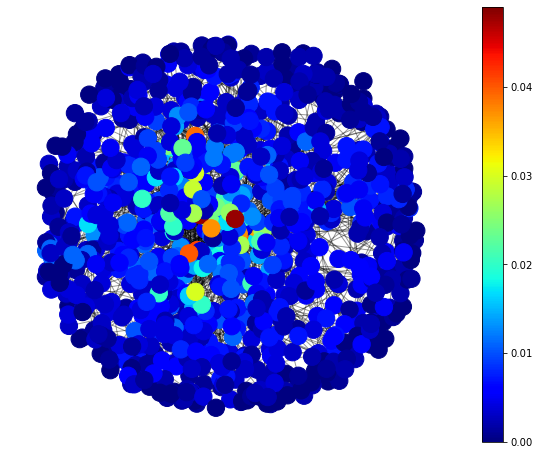

In [52]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree_centrality(M)).values())

# draw edges
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

Centralidade de proximidade

In [54]:
nx.closeness_centrality(M)

{0: 0.0,
 1: 0.1587192987544173,
 2: 0.0,
 3: 0.1569963363276433,
 4: 0.0,
 5: 0.19746726518982116,
 6: 0.0,
 7: 0.001001001001001001,
 8: 0.113698919044831,
 9: 0.0032032032032032033,
 10: 0.12361113250002138,
 11: 0.126997738869885,
 12: 0.13716333936364286,
 13: 0.001001001001001001,
 14: 0.0,
 15: 0.0013346680013346678,
 16: 0.21598719388444598,
 17: 0.1500882368462277,
 18: 0.1728310528501733,
 19: 0.16213567827917602,
 20: 0.10228078148870229,
 21: 0.10377800303173437,
 22: 0.005005005005005005,
 23: 0.15920852600729307,
 24: 0.1570645362999837,
 25: 0.001001001001001001,
 26: 0.14763681607291243,
 27: 0.09636528852946763,
 28: 0.1606944722500278,
 29: 0.001001001001001001,
 30: 0.17127549150287188,
 31: 0.0,
 32: 0.003003003003003003,
 33: 0.15236517596399604,
 34: 0.17357780247842658,
 35: 0.007007007007007007,
 36: 0.15906843931480974,
 37: 0.0065520065520065516,
 38: 0.13577264835244557,
 39: 0.002002002002002002,
 40: 0.17837324250743097,
 41: 0.17160064668370315,
 42: 0.0,


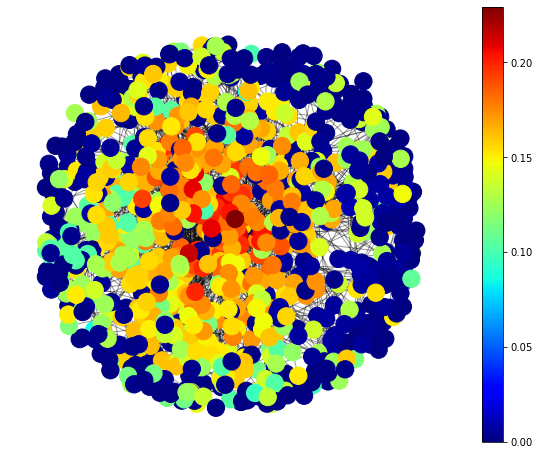

In [55]:
# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.closeness_centrality(M)).values())

# draw edges
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

Centralidade de intermediação

In [56]:
nx.betweenness_centrality(M)

{0: 0.0,
 1: 0.0005826383119641404,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0047841085401261465,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.025454329858589107,
 17: 0.0,
 18: 0.00032002482485370387,
 19: 0.00042218759538156943,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.001796385563920634,
 29: 0.0,
 30: 0.00025277785177353623,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.001003688833520641,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0015451524147223597,
 49: 0.007447953018534209,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0027034038354119536,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.001370148977181943,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.022623858460261503,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.00

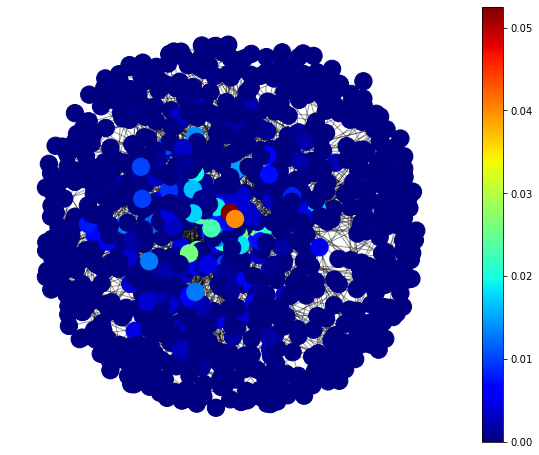

In [57]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(M)).values())

# draw edges
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
#nx.draw_networkx_labels(M, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

Centralidade Vetoria

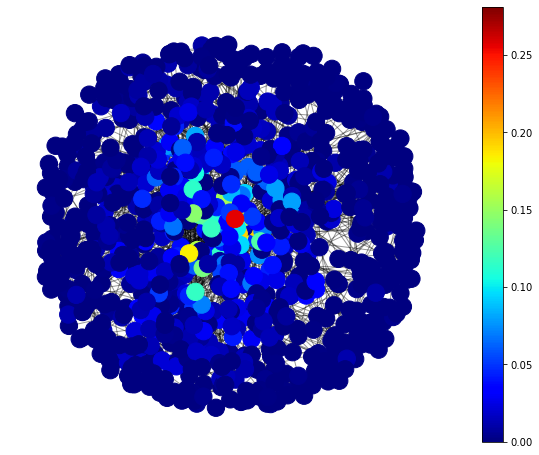

In [58]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(M,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.eigenvector_centrality(M)).values())

# draw edges
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

Todas as centralidade juntas

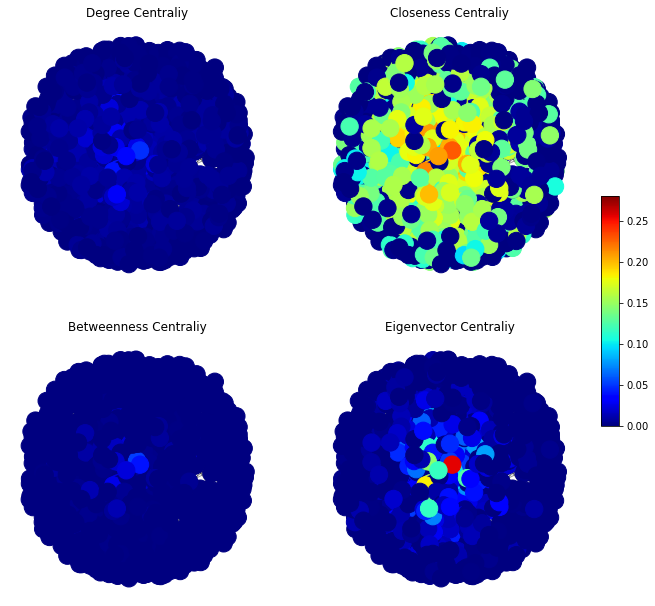

In [59]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(2,2,figsize=(10,8))

# max value of metrics 
max_centrality = max([max([v for k, v in nx.eigenvector_centrality(M).items()]),
                      max([v for k, v in nx.degree_centrality(M).items()]),
                      max([v for k, v in nx.closeness_centrality(M).items()]),
                      max([v for k, v in nx.betweenness_centrality(M).items()])])

# layout position
pos = nx.spring_layout(M,seed=123456789,k=0.3)

# color of nodes
color_degree = list(dict(nx.degree_centrality(M)).values())
color_closeness = list(dict(nx.closeness_centrality(M)).values())
color_betweenness = list(dict(nx.betweenness_centrality(M)).values())
color_eigenvector = list(dict(nx.eigenvector_centrality(M)).values())

# 
# draw edges
#
# degree centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[0,0])

# closeness centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[0,1])

# betweenness centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[1,0])

# eigenvector centrality
nx.draw_networkx_edges(M,
                       pos=pos,
                       alpha=0.4, ax=ax[1,1])

# draw nodes
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_degree,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,0])
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_closeness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[0,1])
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_betweenness,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,0])
nodes = nx.draw_networkx_nodes(M,
                 pos=pos,
                 node_color=color_eigenvector,
                 cmap=plt.cm.jet,vmin=0,vmax=max_centrality,
                 ax=ax[1,1])

# 
# draw labels
#
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[0,0])
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[0,1])
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[1,0])
#nx.draw_networkx_labels(g, pos=pos,
#                        font_color='white', ax=ax[1,1])

# eliminate axis
ax[0,0].axis("off")
ax[1,0].axis("off")
ax[0,1].axis("off")
ax[1,1].axis("off")

ax[0,0].set_title("Degree Centraliy")
ax[0,1].set_title("Closeness Centraliy")
ax[1,0].set_title("Betweenness Centraliy")
ax[1,1].set_title("Eigenvector Centraliy")


# Create an unique colorbar
# reference: https://stackoverflow.com/questions/60848582/unique-colorbar-at-the-right-of-multiple-subplots
plt.subplots_adjust(bottom=0., right=0.92, top=1.)
cax = plt.axes([0.95, 0.3, 0.025, 0.4])
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=max_centrality))
cbar=plt.colorbar(sm,cax)

plt.savefig('alltogether.png', transparent=True,dpi=600,bbox_inches="tight")

Histograma

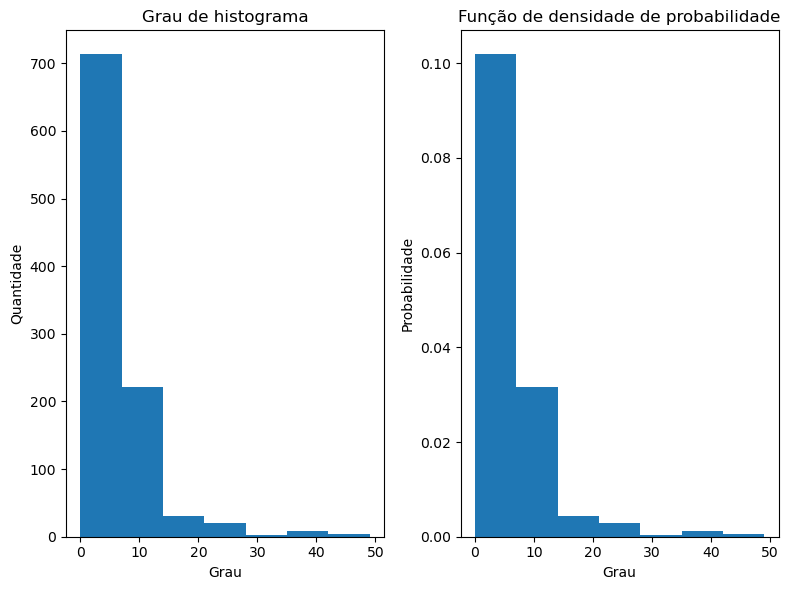

In [60]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in M.degree()], reverse=True)  

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Grau de histograma")
ax[0].set_ylabel("Quantidade")
ax[0].set_xlabel("Grau")

ax[1].set_title("Função de densidade de probabilidade")
ax[1].set_ylabel("Probabilidade")
ax[1].set_xlabel("Grau")

plt.tight_layout()
plt.show()

Função de densidade de probabilidade

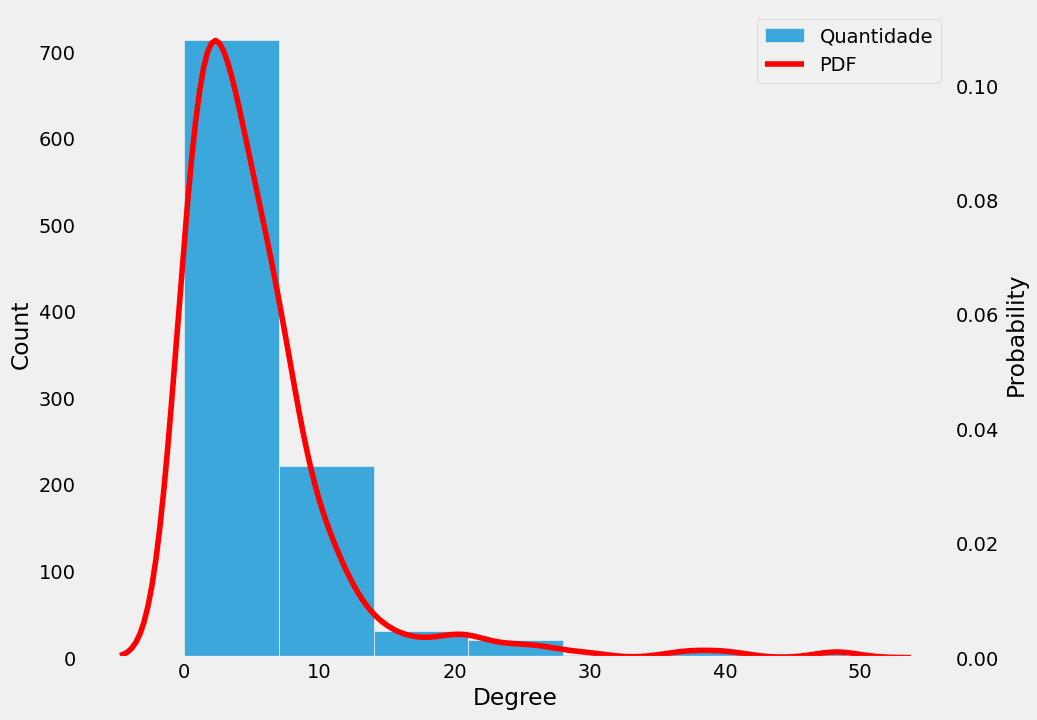

In [63]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Quantidade",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="PDF",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

Função de densidade cumulativa 

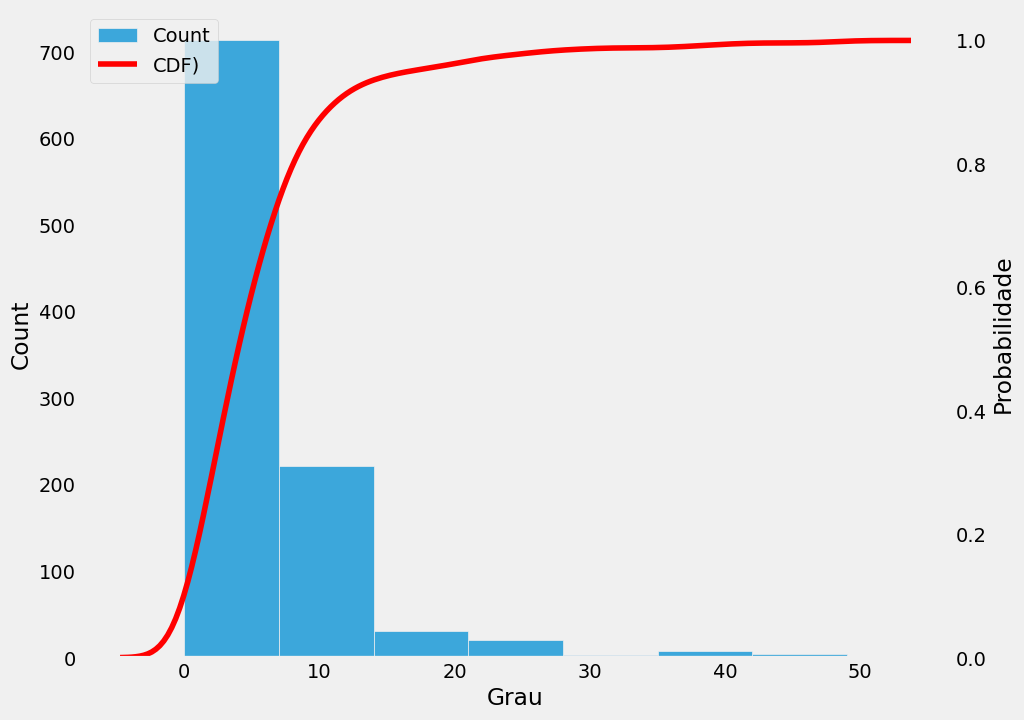

In [64]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Grau")
ax2.set_ylabel("Probabilidade")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

In [67]:
plt.style.use("ggplot")

# Another way to visualize the cumulative distribution
def ecdf(data):
    return np.sort(data), np.arange(1, len(data) + 1) / len(data)

def ecdf_degree(G):
    """ECDF of degree."""
    num_neighbors = [len(list(G.neighbors(n))) for n in G.nodes()]
    x, y = ecdf(num_neighbors)
    plt.scatter(x, y)
    plt.xlabel("Grau")
    plt.ylabel("Fração cumulativa")

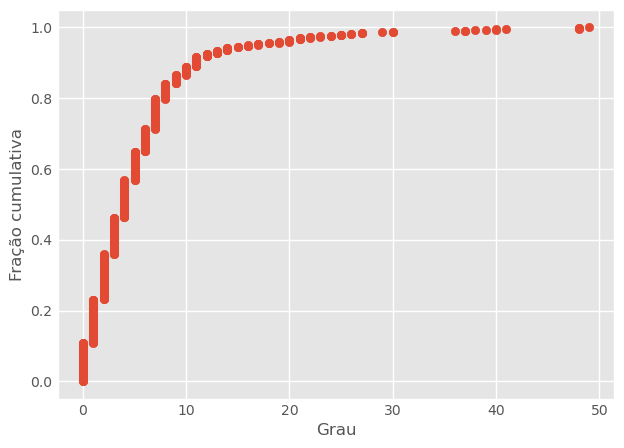

In [68]:
ecdf_degree(M)

In [74]:
#M = nx.from_pandas_edgelist(lista, 'artist_name', 'track_name', ['trackid'], create_using=nx.MultiDiGraph())
#print(M.is_directed(), M.is_multigraph())

True True


In [81]:
print("{} nodes, {} edges".format(len(M), nx.number_of_edges(M)))

1000 nodes, 2697 edges


In [56]:
display("{} nodes, {} edges".format(len(M2), nx.number_of_edges(M2)))

'63230 nodes, 200658 edges'

In [87]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in M.degree()], reverse=True)  

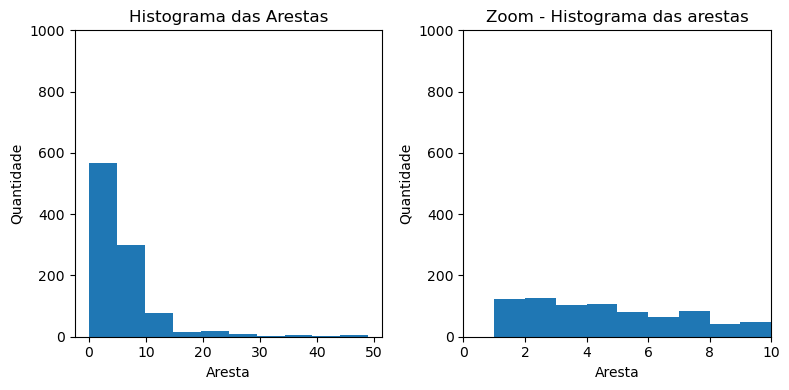

In [90]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Histograma das Arestas")
ax[0].set_ylabel("Quantidade")
ax[0].set_xlabel("Aresta")
ax[0].set_ylim(0,tam)

ax[1].set_title("Zoom - Histograma das arestas")
ax[1].set_ylabel("Quantidade")
ax[1].set_xlabel("Aresta")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,tam)

plt.tight_layout()
plt.show()

In [91]:
# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(M.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(M, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")

769 nodes, 2611 edges
